In [0]:
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, KFold
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split 
import copy
from xgboost import XGBClassifier

#Data Processing

LATITUDE                          0.016586
LONGITUDE                         0.043780
AGE                               0.007886
YEARS_WITH_COMPANY                0.011672
ANNUAL_KILOMETERS                 0.045868
DAILY_KILOMETERS                  0.013870
YEARS_LICENSED                    0.014810
VEHICLE_YEAR                      0.038038
NUMBER_OF_DRIVERS                 0.037032
NUMBER_OF_VEHICLES                0.090148
PRIOR_COMPANY                     0.012938
DEDUCTIBLE_COLLISION              0.016764
DEDUCTIBLE_COMPREHENSIVE          0.009800
DEDUCTIBLE_DCPD                   0.092164
PAYMENT_METHOD                    0.146848
AT_FAULT_CLAIMS                   0.013740
NOT_AT_FAULT_CLAIMS               0.132546
MINOR_CONVICTIONS                 0.047852
MAJOR_CONVICTIONS                 0.008820
SERIOUS_CONVICTIONS               0.076020
DRIVING_EXPERIENCE                0.831750
YEARS_WITH_PRIOR_COMPANY          0.837202
INCURRED_LOSS_COLLISION           0.000000
INCURRED_LO

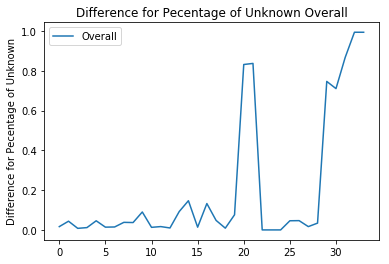

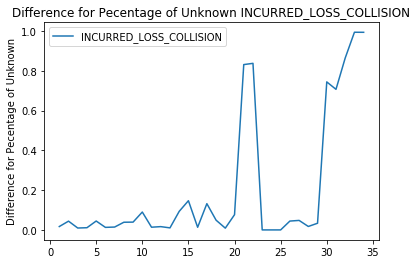

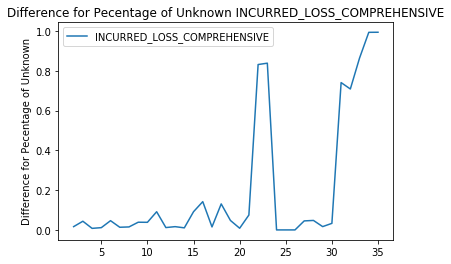

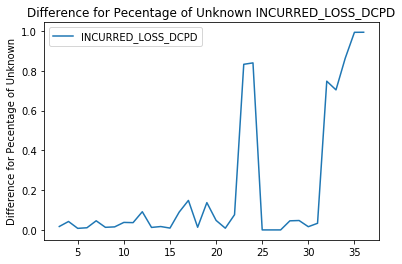

In [2]:
df = pd.read_csv('training_data_large.csv')
nan_sum = df.isna().sum()
nan_prob = nan_sum / len(df)
print(nan_prob)
nan_to_remove_list = ['YEARS_SINCE_AT_FAULT_CLAIM', 
                      'YEARS_SINCE_NOT_AT_FAULT_CLAIM', 
                      'YEARS_SINCE_MINOR_CONVICTION', 
                      'YEARS_SINCE_MAJOR_CONVICTION', 
                      'YEARS_SINCE_SERIOUS_CONVICTION',
                      'DRIVING_EXPERIENCE',
                      'YEARS_WITH_PRIOR_COMPANY',
                     ]
loss_list = ['INCURRED_LOSS_COLLISION', 'INCURRED_LOSS_COMPREHENSIVE', 'INCURRED_LOSS_DCPD']

deductible = ['DEDUCTIBLE_COLLISION',
              'DEDUCTIBLE_COMPREHENSIVE',
              'DEDUCTIBLE_DCPD']

nan_loss_prob = []
#figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
width = 1
ind = np.arange(len(df.columns))
plt.plot(ind, nan_prob , label = 'Overall')
plt.ylabel('Difference for Pecentage of Unknown')
plt.title('Difference for Pecentage of Unknown ' + 'Overall')
plt.legend()
plt.show() 
for l in loss_list:
  ind += width
  lcp = df.loc[df[l] > 0]
  prob = lcp.isna().sum() / len(lcp)
  plt.plot(ind, prob , label = l) 
  plt.ylabel('Difference for Pecentage of Unknown')
  plt.title('Difference for Pecentage of Unknown ' + l)
  plt.legend()
  plt.show() 
def process(data):  
  data.fillna(method='ffill', inplace=True)
  gender = data.pop('GENDER')
  status = data.pop('DRIVER_MARTIAL_STATUS')
  ind = data.pop('DRIVER_TRAINING_IND')

  data['MALE'] = (gender == 'M')*1.0
  #data['FEMALE'] = (gender == 'F')*1.0
  data['STATUS_M'] = (status == 'M')*1.0
  #data['STATUS_S'] = (status == 'S')*1.0
  data['TRAINING_IND_N'] = (ind == 'N')*1.0
  #data['TRAINING_IND_Y'] = (ind == 'Y')*1.0

  data = data.fillna(data.mean())
  nan_sum = data.isna().sum()
  #print(nan_sum / len(nan_sum))
  return data
df = process(df)


#Randomforest

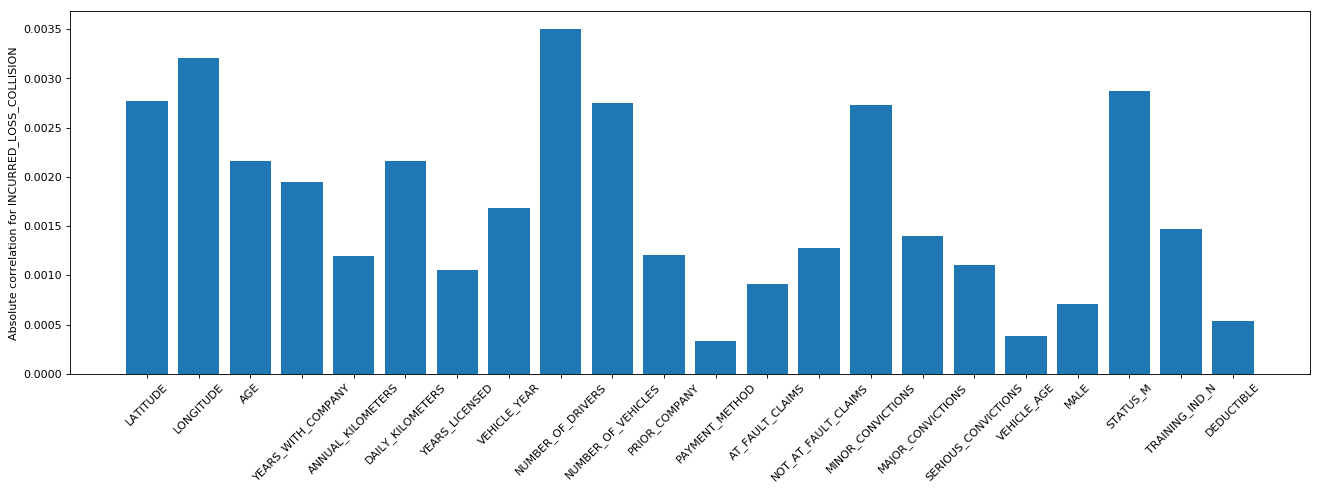

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score for INCURRED_LOSS_COLLISION: 0.9466333333333333
roc auc score for INCURRED_LOSS_COLLISION: 0.49991550426351405
17


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


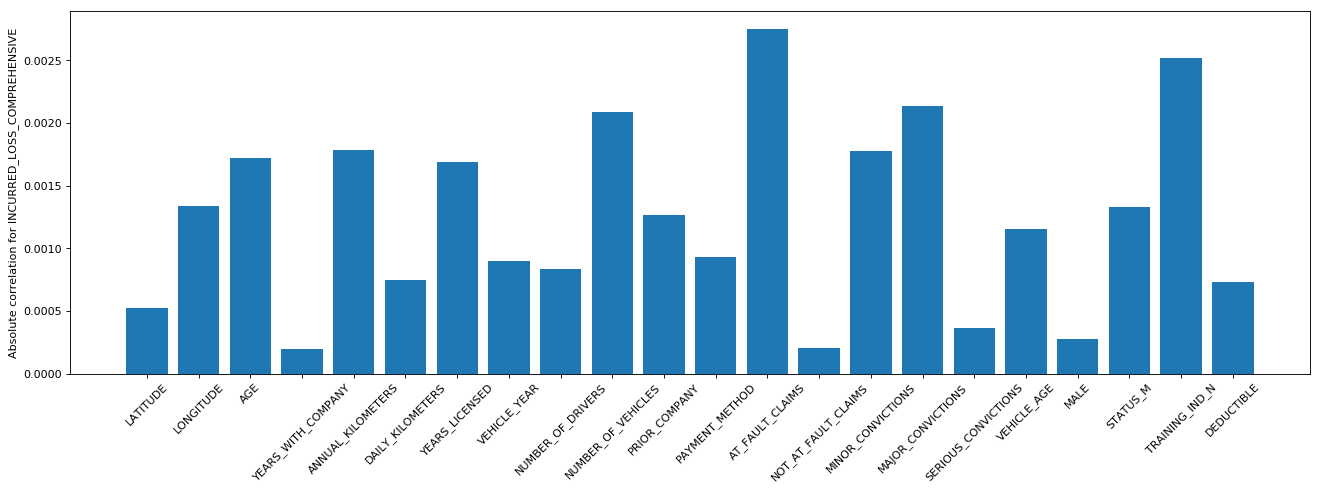

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score for INCURRED_LOSS_COMPREHENSIVE: 0.9474066666666666
roc auc score for INCURRED_LOSS_COMPREHENSIVE: 0.4997537049333776
12


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


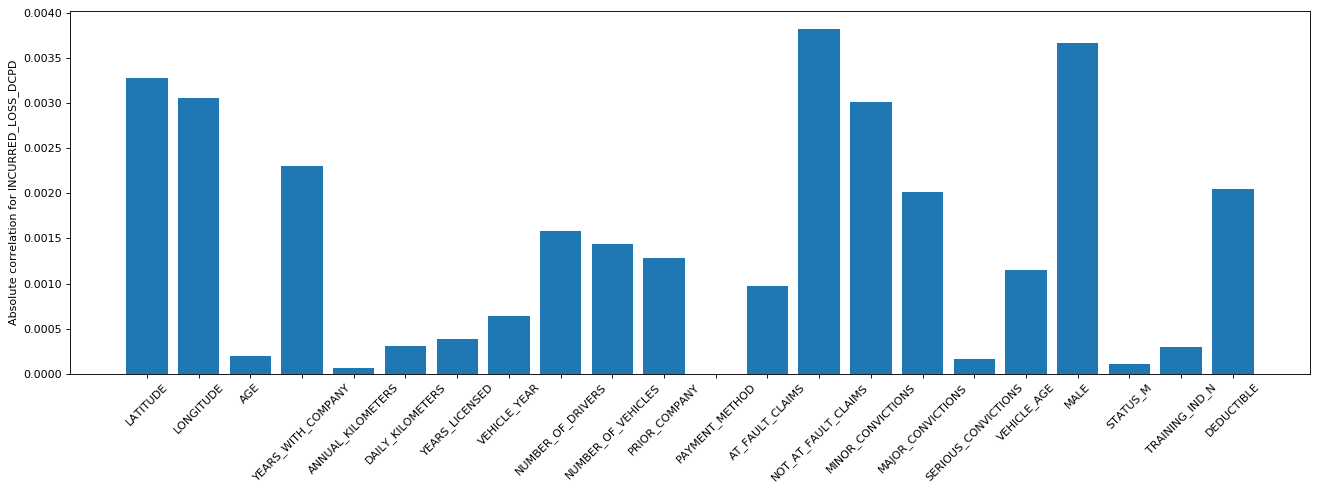

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score for INCURRED_LOSS_DCPD: 0.9478666666666666
roc auc score for INCURRED_LOSS_DCPD: 0.5000083987629003
12


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [7]:
forest_models = []
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
def get_best_model(estimator, params_grid={}):    
    model = GridSearchCV(estimator = estimator,param_grid = params_grid,cv=3, scoring="accuracy", n_jobs= -1)
    model.fit(x_train,y_train)
    print('\n--- Best Parameters -----------------------------')
    print(model.best_params_)
    print('\n--- Best Model -----------------------------')
    best_model = model.best_estimator_
    print(best_model)
    return best_model
  
  
for i in range(len(loss_list)):
  train = copy.deepcopy(df)
  train['DEDUCTIBLE'] = train[deductible[i]]
  train['LOSS_TOTAL'] = train[loss_list[i]]  
  train['LOSSINCURRED'] = np.sign(train.LOSS_TOTAL)

  for loss in loss_list:
    train.pop(loss)
  for nan in nan_to_remove_list:
    train.pop(nan)  
  for d in deductible:
    train.pop(d)
  train.pop('LOSS_TOTAL')
  
  #Choose important feature
  corr_vals=[]
  collabel=[]
  figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
  important_feature=[]
  for col in [i for i in train.columns if i not in ['LOSSINCURRED']]:    
      p_val=sp.stats.pearsonr(train[col],train["LOSSINCURRED"])
      corr_vals.append(np.abs(p_val[0]))
      #print(col,": ",np.abs(p_val[0]))
      collabel.append(col)
      if (np.abs(p_val[0]) > 0.001):
        important_feature.append(col)
        
  plt.bar(range(1,len(corr_vals)+1),corr_vals)
  plt.xticks(range(1,len(corr_vals)+1),collabel,rotation=45)
  plt.ylabel("Absolute correlation for " + loss_list[i])
  plt.show()

  # Data for important feature       
  X = train[important_feature]
  # target value which is 0 or 1
  y = train['LOSSINCURRED']
  
  x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=3)
  clf = RandomForestClassifier()#LogisticRegression(solver='liblinear').fit(x_train, y_train)
  parameters={'n_estimators':[100],
            'max_depth':[10],
            'max_features':[13,23],
            'min_samples_split':[11]}
  #clf = get_best_model(clf, parameters)
  clf.fit(x_train, y_train)
  smote_pred = clf.predict(x_test)#smote.predict(x_test)
  print(f'Accuracy Score for {loss_list[i]}: {accuracy_score(y_test, smote_pred)}')
  print(f'roc auc score for {loss_list[i]}: {roc_auc_score(y_test, smote_pred)}')
  print(len(important_feature))
  clf = RandomForestClassifier()
  clf.fit(X, y)
  forest_models.append([clf, important_feature])

#Prediction Loss

26536


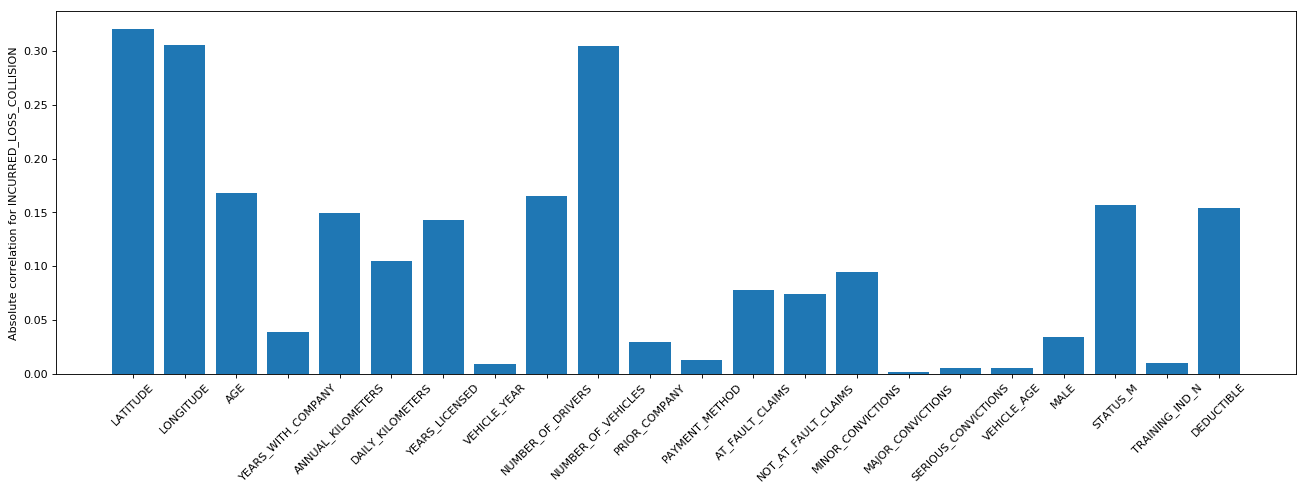

['LATITUDE', 'LONGITUDE', 'AGE', 'YEARS_WITH_COMPANY', 'ANNUAL_KILOMETERS', 'DAILY_KILOMETERS', 'YEARS_LICENSED', 'VEHICLE_YEAR', 'NUMBER_OF_DRIVERS', 'NUMBER_OF_VEHICLES', 'PRIOR_COMPANY', 'PAYMENT_METHOD', 'AT_FAULT_CLAIMS', 'NOT_AT_FAULT_CLAIMS', 'MINOR_CONVICTIONS', 'MAJOR_CONVICTIONS', 'SERIOUS_CONVICTIONS', 'VEHICLE_AGE', 'MALE', 'STATUS_M', 'TRAINING_IND_N', 'DEDUCTIBLE']


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


INCURRED_LOSS_COLLISION
Mean Absolute Error: 0.134040677260145
Mean Squared Error: 0.03114873581303876
Root Mean Squared Error INCURRED_LOSS_COLLISION : 2561.5566400177013


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


26298


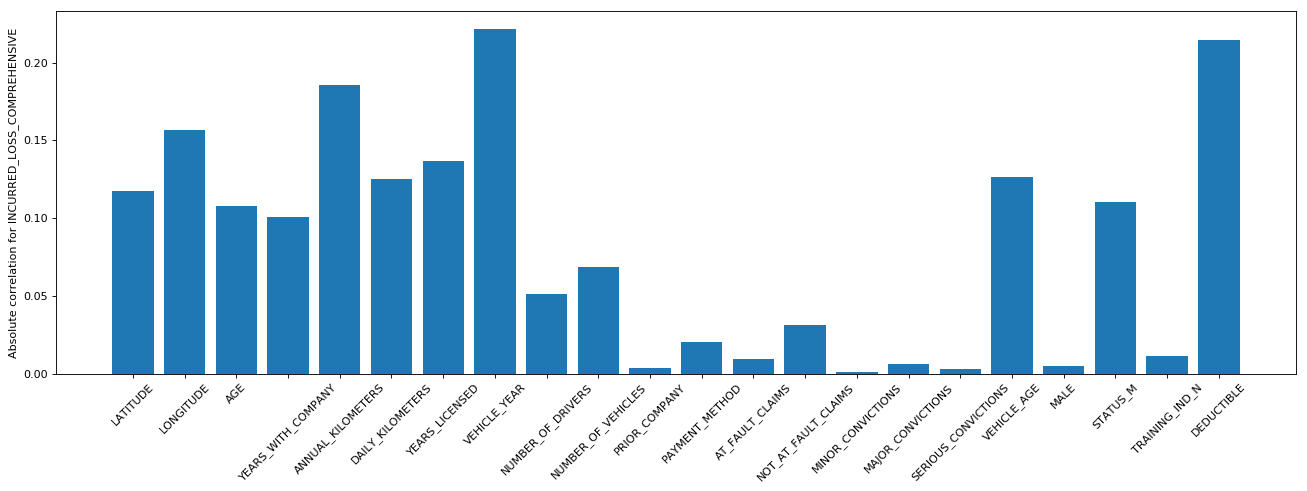

['LATITUDE', 'LONGITUDE', 'AGE', 'YEARS_WITH_COMPANY', 'ANNUAL_KILOMETERS', 'DAILY_KILOMETERS', 'YEARS_LICENSED', 'VEHICLE_YEAR', 'NUMBER_OF_DRIVERS', 'NUMBER_OF_VEHICLES', 'PRIOR_COMPANY', 'PAYMENT_METHOD', 'AT_FAULT_CLAIMS', 'NOT_AT_FAULT_CLAIMS', 'MINOR_CONVICTIONS', 'MAJOR_CONVICTIONS', 'SERIOUS_CONVICTIONS', 'VEHICLE_AGE', 'MALE', 'STATUS_M', 'TRAINING_IND_N', 'DEDUCTIBLE']


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


INCURRED_LOSS_COMPREHENSIVE
Mean Absolute Error: 0.13029843657617254
Mean Squared Error: 0.034914332922414616
Root Mean Squared Error INCURRED_LOSS_COMPREHENSIVE : 6226.408426649524


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


25718


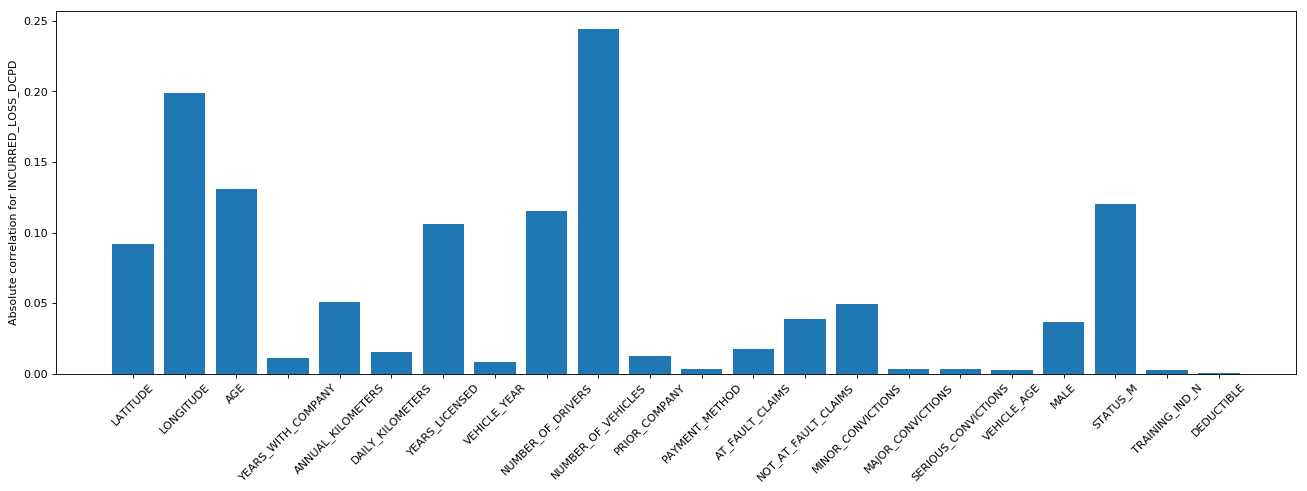

['LATITUDE', 'LONGITUDE', 'AGE', 'YEARS_WITH_COMPANY', 'ANNUAL_KILOMETERS', 'DAILY_KILOMETERS', 'YEARS_LICENSED', 'VEHICLE_YEAR', 'NUMBER_OF_DRIVERS', 'NUMBER_OF_VEHICLES', 'PRIOR_COMPANY', 'PAYMENT_METHOD', 'AT_FAULT_CLAIMS', 'NOT_AT_FAULT_CLAIMS', 'MINOR_CONVICTIONS', 'MAJOR_CONVICTIONS', 'SERIOUS_CONVICTIONS', 'VEHICLE_AGE', 'MALE', 'STATUS_M', 'TRAINING_IND_N']


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


INCURRED_LOSS_DCPD
Mean Absolute Error: 0.11659843961532296
Mean Squared Error: 0.03189333985363815
Root Mean Squared Error INCURRED_LOSS_DCPD : 2596.65963902045


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


3


In [4]:
regressor_models = []
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
for i in range(len(loss_list)): 
  cp = copy.deepcopy(df)
  cp['LOSS'] = cp[loss_list[i]]  
  cp['DEDUCTIBLE'] = cp[deductible[i]]
  ilc = cp.loc[cp['LOSS'] > 0]# copy.deepcopy(df)#df.loc[df['LOSS'] > 0]
  
  # Remove we don't care
  for loss in loss_list:
    ilc.pop(loss)
  for nan in nan_to_remove_list:
    ilc.pop(nan)  
  for d in deductible:
    ilc.pop(d)
    
    
  #for d in convictions:
  #  ilc.pop(d)
  print(len(ilc))  
  corr_vals=[]
  collabel=[]
  figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
  important_feature=[]
  for col in [i for i in ilc.columns if i not in ['LOSS']]:    
      p_val=sp.stats.pearsonr(ilc[col],ilc["LOSS"])
      corr_vals.append(np.abs(p_val[0]))
      #print(col,": ",np.abs(p_val[0]))
      collabel.append(col)
      if (np.abs(p_val[0]) > 0.001):
        important_feature.append(col)
        
  plt.bar(range(1,len(corr_vals)+1),corr_vals)
  plt.xticks(range(1,len(corr_vals)+1),collabel,rotation=45)
  plt.ylabel("Absolute correlation for " + loss_list[i])
  plt.show()
  print(important_feature)
  
  # Feature data
  X = ilc[important_feature]
  # Target loss        
  y = np.log(ilc['LOSS'])
  
  # Crossvalidation 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  #cor = ilc.corr()
  #plt.figure(figsize=(20,20))
  #colormap = plt.cm.viridis
  #sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1).set_title(loss_list[i])  
 
  regressor = RandomForestRegressor()#MLPRegressor()  
  regressor.fit(X_train, y_train)
  
  y_pred = regressor.predict(X_test)
  print(loss_list[i])
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
  print(f'Root Mean Squared Error {loss_list[i]} : {np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred)))}')
  regressor = RandomForestRegressor()  
  regressor.fit(X, y)
  regressor_models.append([regressor, important_feature])
print(len(regressor_models))

In [5]:
test_df = pd.read_csv('training_data_small.csv')

test_df = process(test_df)
for i in range(len(loss_list)):
  df_test_linear = copy.deepcopy(test_df)
  test_df['DEDUCTIBLE'] = test_df[deductible[i]]
  test_df['LOSS_TOTAL'] = test_df[loss_list[i]]  
  test_df['LOSSINCURRED'] = np.sign(test_df.LOSS_TOTAL)  
  y_test = test_df[loss_list[i]]
  model = forest_models[i][0]
  feature = forest_models[i][1]
  print(len(feature))
  x_test_xgb = test_df[feature]
  y_pred = model.predict(x_test_xgb)

  df_test_linear['L'] = copy.deepcopy(y_pred)

  df_test_linear = df_test_linear.loc[df_test_linear['L'] > 0]
  print(len(y_pred))
  df_test_linear['LOSS'] = df_test_linear[loss_list[i]]  
  df_test_linear['DEDUCTIBLE'] = df_test_linear[deductible[i]]
  df_test_linear.pop('L')
  model = regressor_models[i][0]
  x_test_linear = df_test_linear[regressor_models[i][1]]

  y_pred_linear = model.predict(x_test_linear)
  k = 0
  for j in range(len(y_pred)):
    if y_pred[j] == 1:
      y_pred[j] = np.exp(y_pred_linear[k])
      k += 1
  print(f'Root Mean Squared Error for {loss_list[i]}: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

22
100000
Root Mean Squared Error for INCURRED_LOSS_COLLISION: 2408.520871597338
22
100000
Root Mean Squared Error for INCURRED_LOSS_COMPREHENSIVE: 5785.1607636045865
20
100000
Root Mean Squared Error for INCURRED_LOSS_DCPD: 2519.610648618155


In [9]:
test_df = pd.read_csv('testing_data.csv')

test_df = process(test_df)
output_loss = []
for i in range(len(loss_list)):
  df_test_linear = copy.deepcopy(test_df)
  test_df['DEDUCTIBLE'] = test_df[deductible[i]]
  #test_df['LOSS_TOTAL'] = test_df[loss_list[i]]  
  #test_df['LOSSINCURRED'] = np.sign(test_df.LOSS_TOTAL)  
  #y_test = test_df[loss_list[i]]
  model = forest_models[i][0]
  feature = forest_models[i][1]
  print(len(feature))
  x_test_xgb = test_df[feature]
  y_pred = model.predict(x_test_xgb)

  df_test_linear['L'] = copy.deepcopy(y_pred)

  df_test_linear = df_test_linear.loc[df_test_linear['L'] > 0]
  print(len(y_pred))
  #df_test_linear['LOSS'] = df_test_linear[loss_list[i]]  
  df_test_linear['DEDUCTIBLE'] = df_test_linear[deductible[i]]
  df_test_linear.pop('L')
  model = regressor_models[i][0]
  x_test_linear = df_test_linear[regressor_models[i][1]]

  y_pred_linear = model.predict(x_test_linear)
  k = 0
  for j in range(len(y_pred)):
    if y_pred[j] == 1:
      y_pred[j] = np.exp(y_pred_linear[k])
      k += 1
  output_loss.append(y_pred)

17
992027
12
992027
12
992027


In [14]:
data = np.array(output_loss).transpose() 
final_df = pd.DataFrame(data, columns = [loss_list])
print(len(final_df))
final_df.to_csv(r'loss_result.csv', index=False)
print(final_df.astype(bool).sum(axis=0))

992027
INCURRED_LOSS_COLLISION        117
INCURRED_LOSS_COMPREHENSIVE    849
INCURRED_LOSS_DCPD             588
dtype: int64
